# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## Background
Melakukan webscrapping ditujukan agar mendapatkan data yang dibutuhkan dari suatu web sehingga dapat bermanfaat dan dapat dibaca dengan baik.


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [41]:
import requests

url_get = requests.get()

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [42]:
url_get.content[1:500]

b'!DOCTYPE html>\r\n<!--[if lt IE 9]>\r\n<html class="no-js ie8 oldie" lang="en" xml:lang=\'en\'>\r\n<![endif]-->\r\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" xml:lang=\'en\'><!--<![endif]-->\r\n<head>\r\n<title>Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates</title>\r\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n<meta name="viewport" content="width=device-width, initial-scale=1, maximum-scale=5">\r\n<meta charset="utf-8" /><meta http-equiv="Content-Type" content="text/ht'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [43]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [44]:
print(soup.prettify()[:500])

<!DOCTYPE html>
<!--[if lt IE 9]>
<html class="no-js ie8 oldie" lang="en" xml:lang='en'>
<![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js" lang="en" xml:lang="en">
 <!--<![endif]-->
 <head>
  <title>
   Indonesian Rupiah Exchange Rate - US Dollar - Historical Exchange Rates
  </title>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1, maximum-scale=5" name="viewport"/>
  <meta charset="utf-8">
   <meta content="text/html; charse


## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [45]:
table = soup.find('div', attrs={'class':'table-responsive'})
print(table.prettify()[1:500])

div class="table-responsive">
 <table class="table table-striped table-hover table-hover-solid-row table-simple history-data">
  <tbody>
   <tr>
    <td>
     7/8/2022
    </td>
    <td>
     Friday
    </td>
    <td>
     <a href="/Rate/USD/IDR/7-8-2022">
      14,976.95000
     </a>
     IDR
    </td>
    <td class="text-narrow-screen-hidden">
     <a href="/Rate/USD/IDR/7-8-2022">
      USD IDR rate for 7/8/2022
     </a>
    </td>
   </tr>
   <tr>
    <td>
     7/7/2022
    </td>
    <td>
 


Finding row length.

In [46]:
row = table.find_all('td')[4*1-4].text

In [47]:
row=table.find_all('td', attrs={'class' : 'text-narrow-screen-hidden'})

In [48]:
row_length = len(row)
row_length

130

Do the scrapping process here (please change this markdown with your explanation)

In [49]:
temp = [] #initiating a tuple

for i in range(1, 130):

    ##get 'the date' lisbt
    Date = table.find_all('td')[4*(i)-4].text
    
    #get 'the rate' list
    Rate = table.find_all('td')[4*(i)-2].text
    Rate_1 = Rate.strip()
    
    temp.append((Date,Rate_1))
    
temp 

[('7/8/2022', '14,976.95000 IDR'),
 ('7/7/2022', '14,964.65000 IDR'),
 ('7/6/2022', '14,996.82520 IDR'),
 ('7/5/2022', '15,014.65000 IDR'),
 ('7/4/2022', '14,994.55000 IDR'),
 ('7/1/2022', '14,975.15000 IDR'),
 ('6/30/2022', '14,928.80000 IDR'),
 ('6/29/2022', '14,868.90000 IDR'),
 ('6/28/2022', '14,852.35000 IDR'),
 ('6/27/2022', '14,807.70000 IDR'),
 ('6/24/2022', '14,829.50000 IDR'),
 ('6/23/2022', '14,848.80000 IDR'),
 ('6/22/2022', '14,833.90000 IDR'),
 ('6/21/2022', '14,833.60000 IDR'),
 ('6/20/2022', '14,827.75000 IDR'),
 ('6/17/2022', '14,838.85000 IDR'),
 ('6/16/2022', '14,809.20000 IDR'),
 ('6/15/2022', '14,695.10000 IDR'),
 ('6/14/2022', '14,764.20000 IDR'),
 ('6/13/2022', '14,782.80000 IDR'),
 ('6/10/2022', '14,614.95000 IDR'),
 ('6/9/2022', '14,611.85000 IDR'),
 ('6/8/2022', '14,513.20000 IDR'),
 ('6/7/2022', '14,465.30000 IDR'),
 ('6/6/2022', '14,437.70000 IDR'),
 ('6/3/2022', '14,433.50000 IDR'),
 ('6/2/2022', '14,435.00000 IDR'),
 ('6/1/2022', '14,555.60000 IDR'),
 ('5/

In [50]:
temp = temp[::-1]
temp

[('1/11/2022', '14,284.46501 IDR'),
 ('1/12/2022', '14,298.95000 IDR'),
 ('1/13/2022', '14,309.00000 IDR'),
 ('1/14/2022', '14,314.55000 IDR'),
 ('1/17/2022', '14,331.25000 IDR'),
 ('1/18/2022', '14,358.70000 IDR'),
 ('1/19/2022', '14,362.85000 IDR'),
 ('1/20/2022', '14,327.60000 IDR'),
 ('1/21/2022', '14,329.75000 IDR'),
 ('1/24/2022', '14,350.70000 IDR'),
 ('1/25/2022', '14,330.55000 IDR'),
 ('1/26/2022', '14,366.45000 IDR'),
 ('1/27/2022', '14,395.00000 IDR'),
 ('1/28/2022', '14,383.40000 IDR'),
 ('1/31/2022', '14,339.40000 IDR'),
 ('2/1/2022', '14,328.30000 IDR'),
 ('2/2/2022', '14,355.35000 IDR'),
 ('2/3/2022', '14,387.00000 IDR'),
 ('2/4/2022', '14,400.70000 IDR'),
 ('2/7/2022', '14,394.90000 IDR'),
 ('2/8/2022', '14,386.75000 IDR'),
 ('2/9/2022', '14,334.30000 IDR'),
 ('2/10/2022', '14,357.00000 IDR'),
 ('2/11/2022', '14,344.75000 IDR'),
 ('2/14/2022', '14,303.45000 IDR'),
 ('2/15/2022', '14,265.45000 IDR'),
 ('2/16/2022', '14,274.45000 IDR'),
 ('2/17/2022', '14,357.40000 IDR'),

## Creating data frame & Data wrangling

Put the array into dataframe

In [51]:
import pandas as pd

df = pd.DataFrame(temp, columns=('Date','Rate'))
df.head()

,Date,Rate
0,1/11/2022,"14,284.46501 IDR"
1,1/12/2022,"14,298.95000 IDR"
2,1/13/2022,"14,309.00000 IDR"
3,1/14/2022,"14,314.55000 IDR"
4,1/17/2022,"14,331.25000 IDR"


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

In [52]:
#clear IDR to '-'
df['Rate']=df['Rate'].str.replace('IDR','')
df.head()


,Date,Rate
0,1/11/2022,"14,284.46501"
1,1/12/2022,"14,298.95000"
2,1/13/2022,"14,309.00000"
3,1/14/2022,"14,314.55000"
4,1/17/2022,"14,331.25000"


In [53]:
#clear the ',' to '.'
df['Rate']=df['Rate'].str.replace(',','')
df.dtypes

Date    object
Rate    object
dtype: object

In [54]:
#change type Date and Rate to 'datetime64' and 'float64'
df['Date'] = df['Date'].astype('datetime64')
df['Rate'] = df['Rate'].astype('float64')

In [55]:
df.dtypes

Date    datetime64[ns]
Rate           float64
dtype: object

In [56]:
#change index to Date
df=df.set_index('Date')

Data visualisation (please change this markdown with your explanation of what you do for data wrangling)
1. we put the 'Rate' data in y and 'Date' data in x
2. the orange line also explains the mean data/simple moving average

<AxesSubplot:xlabel='Date'>

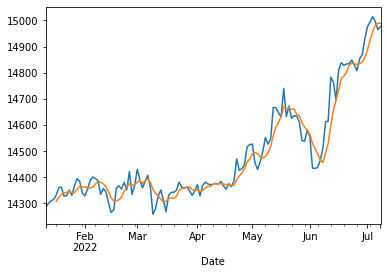

In [57]:
df['Rate'].plot()
df['Rate'].rolling(window=5).mean().plot()

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

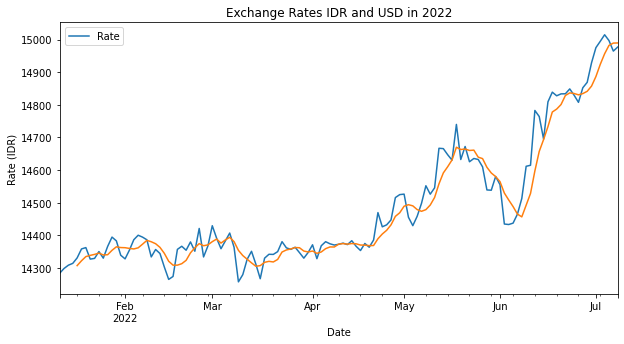

In [58]:
df.plot(title='Exchange Rates IDR and USD in 2022'
       ,ylabel='Rate (IDR)',
       figsize=(10,5)),df['Rate'].rolling(window=5).mean().plot();


(Put your analysis and conclusion here.)
1. Nilai tukar rupiah dari bulan Feb-Jul mengalami penurunan/melemah terhadap dolar.
2. Berdasarkan beberapa sumber, terdapat peristiwa yang mendukung pelemahan nilai tukar rupiah terhadap dolar yaitu:
a) adanya perang Rusia-Ukraina
b) harga minyak dunia mengalami kenaikan
c) inflasi terjadi di US
d) kebijakan Fed.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.